In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from datetime import timedelta  

from PIL import Image
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [7]:
tweets = pd.read_csv('tesla_tweets_not_clean.csv', header=None, names=['id','text','created_at','favorite_count','retweet_count','user','screen_name'])
tweets.head()

,id,text,created_at,favorite_count,retweet_count,user,screen_name
0,1106281582946590720,@Tesla Design it to be the perfect looking car...,Thu Mar 14 19:50:57 +0000 2019,0.0,0,katherine,katherine828
1,1106281591641247744,@Seanmmvi @Erdayastronaut @Tesla @SpaceX This ...,Thu Mar 14 19:50:59 +0000 2019,0.0,0,Joseph Lustig,boadickia
2,1106281982928003072,Amazing! I wish $AAPL would do the same in the...,Thu Mar 14 19:52:33 +0000 2019,0.0,0,Titus Pacis,TitusPacis
3,1106281988737196037,@Tesla Wow. The S3XY family will be complete. ...,Thu Mar 14 19:52:34 +0000 2019,0.0,0,Lukas,Lukas94597338
4,1106282003694010371,It's time to call it a night. I'm tired after ...,Thu Mar 14 19:52:38 +0000 2019,0.0,0,"𝓐𝓷𝓷𝓪 ♛¸,ø¤º°`°º¤ø,¸",anna88058347


In [8]:
tweets = tweets[~tweets['created_at'].isin(['0',' '])]
tweets['created_at'] = pd.to_datetime(tweets['created_at'], format="%a %b %d %H:%M:%S +%f %Y")
tweets['retweet_count']=tweets['retweet_count'].astype('float')
tweets['screen_name'] = tweets['screen_name'].apply(lambda tweet: deEmojify(str(tweet)))
tweets['user'] = tweets['user'].apply(lambda tweet: deEmojify(str(tweet)))

In [9]:
tweets_week = tweets[(tweets['created_at'].dt.date >= dt.date(2019,3,1)) & (tweets['created_at'].dt.date <= dt.date(2019,5,14))]
tweets_week_grouped = tweets_week.groupby(tweets_week['created_at'].dt.date).count().drop('created_at', axis=1).reset_index()

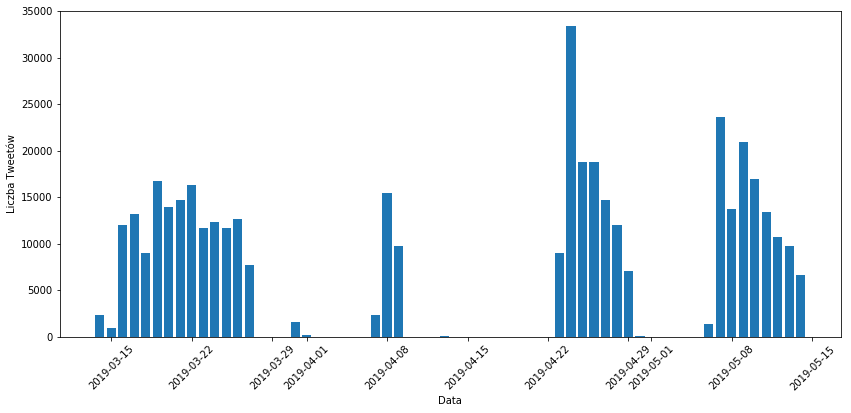

In [10]:
plt.figure(figsize=(14,6))
plt.bar(tweets_week_grouped['created_at'],tweets_week_grouped['id'])
plt.xticks(rotation=45)
plt.xlabel('Data', color='black')
plt.ylabel('Liczba Tweetów', color='black')
plt.savefig('tweets_per_choosen_week.png', dpi=400, transparent=True, edgecolor='black')

In [11]:
tweets.head()

,id,text,created_at,favorite_count,retweet_count,user,screen_name
0,1106281582946590720,@Tesla Design it to be the perfect looking car...,2019-03-14 19:50:57,0.0,0.0,katherine,katherine828
1,1106281591641247744,@Seanmmvi @Erdayastronaut @Tesla @SpaceX This ...,2019-03-14 19:50:59,0.0,0.0,Joseph Lustig,boadickia
2,1106281982928003072,Amazing! I wish $AAPL would do the same in the...,2019-03-14 19:52:33,0.0,0.0,Titus Pacis,TitusPacis
3,1106281988737196037,@Tesla Wow. The S3XY family will be complete. ...,2019-03-14 19:52:34,0.0,0.0,Lukas,Lukas94597338
4,1106282003694010371,It's time to call it a night. I'm tired after ...,2019-03-14 19:52:38,0.0,0.0,",`,",anna88058347


In [12]:
tweets_list = tweets['text'].astype(str)
tweets_list.head()

0    @Tesla Design it to be the perfect looking car...
1    @Seanmmvi @Erdayastronaut @Tesla @SpaceX This ...
2    Amazing! I wish $AAPL would do the same in the...
3    @Tesla Wow. The S3XY family will be complete. ...
4    It's time to call it a night. I'm tired after ...
Name: text, dtype: object

In [13]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def clear_text(text, stop_words, porter):
    tokens = word_tokenize(text)
    words = [word.lower() for word in tokens if word.isalpha()]
    words = [w for w in words if not w in stop_words]
    # Za bardzo ucina
    #stemmed = [porter.stem(word) for word in words]
    #joined = ' '.join(stemmed)
    joined = ' '.join(words)
    return joined

In [14]:
stop_words = stopwords.words('english')
porter = PorterStemmer()

tweets['text_clean'] = tweets['text'].apply(lambda tweet: clear_text(str(tweet), stop_words, porter))

In [15]:
tweets.sample(10)

,id,text,created_at,favorite_count,retweet_count,user,screen_name,text_clean
385206,1125658951524208640,@Tesla Boaty McBoatface,2019-05-07 07:09:42,0.0,0.0,Alex,The_Real_AIex,tesla boaty mcboatface
221033,1115615917906505728,#Trading opportunities. Here are the #stocks t...,NaT,NaN,NaN,nan,nan,trading opportunities stocks watch
320300,1121406927387418625,@talesftf @CGasparino @elonmusk @Tesla Musk sa...,2019-04-25 13:33:40,0.0,0.0,Shal,Shalxxx1,talesftf cgasparino elonmusk tesla musk said b...
290108,1121030805369839626,Ford will invest $500 million in Tesla rival R...,2019-04-24 12:39:06,0.0,0.0,Angie Kozleski,akozlesk,ford invest million tesla rival rivian joining...
343164,1121902589472387072,Elon Musk makes deal with SEC not to discuss T...,2019-04-26 22:23:15,0.0,0.0,Gte Burnout,khHASsBCcSFmDbg,elon musk makes deal sec discuss tesla finance...
293836,1121074468858810368,@evannex_com An awesome experience for Tesla C...,2019-04-24 15:32:36,0.0,0.0,"X Auto - EV, Tesla News",XAutoWorld100,awesome experience tesla customers getting car...
85670,1108917442246569986,Son shows off his Tesla to mom and grandmother 👆🏽,2019-03-22 02:24:55,0.0,0.0,Jim Richards Shwgram,JIMrichards1010,son shows tesla mom grandmother
464874,1127268882589175808,@MKBHD Dogs are wise souls@Tesla,2019-05-11 17:46:59,0.0,0.0,TEDxSVNIT,tedxsvnit,mkbhd dogs wise souls tesla
267127,1120790616420438016,https://t.co/Y7SSxV5pX2 Autoline Daily guest S...,2019-04-23 20:44:40,0.0,0.0,Ken Goeller,kengoeller,https autoline daily guest sandy munro talks t...
103035,1109405835673899008,@feliksngu @Tesla @elonmusk But stil awesome!!!,2019-03-23 10:45:37,0.0,0.0,B Ortiz,bombero1394,feliksngu tesla elonmusk stil awesome


In [16]:
tweets.to_csv('tesla_cleaned.csv', index=False, header=False)